In [1]:
%matplotlib inline
import seaborn
import numpy, scipy, matplotlib.pyplot as plt, IPython.display as ipd, urllib
import librosa, librosa.display

[&larr; Back to Index](index.html)

# Onset Detection

Automatic detection of musical events in an audio signal is one of the most fundamental tasks in music information retrieval. Here, we will show how to detect an **onset**, the very instant that marks the beginning of the transient part of a sound, or the earliest moment at which a transient can be reliably detected.

For more reading, see [this tutorial on onset detection by Juan Bello](https://files.nyu.edu/jb2843/public/Publications_files/2005_BelloEtAl_IEEE_TSALP.pdf).

Download an audio file:

In [2]:
filename = 'Classic Rock Beat 06.wav'
urllib.urlretrieve(
    'http://audio.musicinformationretrieval.com/Jam Pack 1/' + filename,
    filename=filename
)

('Classic Rock Beat 06.wav', <httplib.HTTPMessage instance at 0x110901ea8>)

Load the audio file into the NumPy array `x` and sampling rate `fs`. 

In [3]:
x, sr = librosa.load(filename)
print x.shape, sr

(151521,) 22050


Plot the signal:

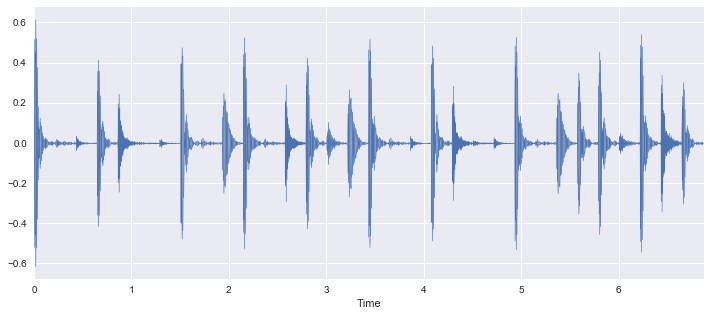

In [4]:
plt.figure(figsize=(12, 5))
librosa.display.waveplot(x, sr)

Listen:

In [5]:
ipd.Audio(x, rate=sr)

## `librosa.onset.onset_detect`

[`librosa.onset.onset_detect`](http://librosa.github.io/librosa/generated/librosa.onset.onset_detect.html#librosa.onset.onset_detect) returns the frame indices for estimated onsets in a signal:

In [6]:
onset_frames = librosa.onset.onset_detect(x, sr=sr)
print onset_frames # frame numbers of estimated onsets

[ 20  29  38  57  66  75  84  93 103 112 121 131 140 149 158 167 176 185
 196 204 213 232 241 250 260 269 278 288]


Convert onsets to units of seconds:

In [7]:
onset_times = librosa.frames_to_time(onset_frames)
print onset_times

[ 0.46439909  0.67337868  0.88235828  1.32353741  1.53251701  1.7414966
  1.95047619  2.15945578  2.39165533  2.60063492  2.80961451  3.04181406
  3.25079365  3.45977324  3.66875283  3.87773243  4.08671202  4.29569161
  4.55111111  4.73687075  4.94585034  5.38702948  5.59600907  5.80498866
  6.03718821  6.2461678   6.45514739  6.68734694]


Plot the onsets on top of a spectrogram of the audio:

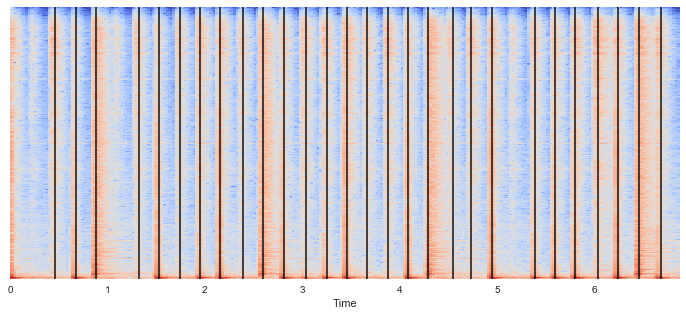

In [8]:
S = librosa.stft(x)
logS = librosa.logamplitude(S)
plt.figure(figsize=(12, 5))
librosa.display.specshow(logS, sr=sr, x_axis='time')
plt.vlines(onset_times, 0, logS.shape[0], color='k', alpha=0.8)

Let's also plot the onsets with the time-domain waveform.

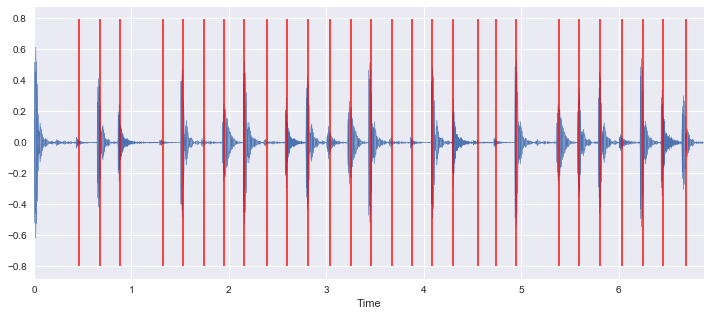

In [9]:
plt.figure(figsize=(12, 5))
librosa.display.waveplot(x, sr=sr)
plt.vlines(onset_times, -0.8, 0.79, color='r', alpha=0.8) 

## librosa.clicks

We can add a click at the location of each detected onset.

In [10]:
clicks = librosa.clicks(frames=onset_frames, sr=sr, length=len(x))

Listen to the original audio plus the detected onsets:

In [11]:
ipd.Audio(x + clicks, rate=sr)

[&larr; Back to Index](index.html)